# An√°lise do per√≠odo de um p√™ndulo planar simples

### Importando bibliotecas e definindo fun√ß√µes a serem usadas abaixo

In [1]:
using Images
using Plots
using BenchmarkTools
using DifferentialEquations.OrdinaryDiffEq

## O p√™ndulo

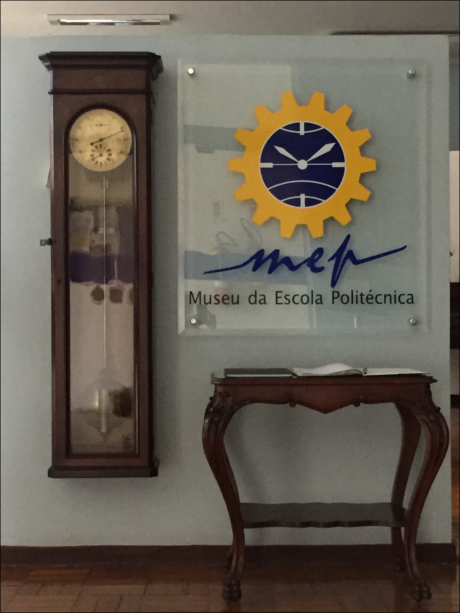

In [2]:
imresize(load(joinpath("img","pendulo_museu_politecnica.jpg")), ratio = 3/4)

## Um p√™ndulo esquematizado

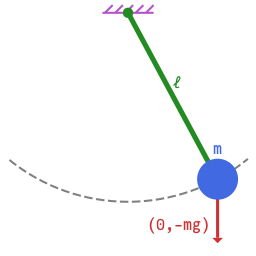

In [3]:
load(joinpath("img","pendulum_256x256.png"))

## O modelo cl√°ssico

* O modelo cl√°ssico para a oscila√ß√£o do p√™ndulo √© obtida assumindo-se que o movimento do p√™ndulo √© planar e considerando-se o estado do sistema como definido unicamente pelo √¢ngulo $\theta$, no sentido trigonom√©trico, que a haste faz com o eixo $y$ no sentido negativo, ou seja, com o vetor $-\mathbf{e}_2 = (0, -1)$.

* Os par√¢metros considerados essenciais para problema s√£o

  * O **comprimento** $\ell$ da haste do p√™ndulo
  
  * A **massa** $m$ do p√™ndulo
  
  * A acelera√ß√£o da **gravidade** $g$

* Em um modelo inicial simplificado, desprezamos a **resist√™ncia do ar**; a **elasticidade** (mesmo que m√≠nima) da haste; a varia√ß√£o na **temperatura** ambiente, que tamb√©m altera o comprimento da haste; e o movimento possivelmente tridimensional do mesmo.

## Hip√≥teses e modelo

- A for√ßa da gravidade exercida no p√™ndulo √© decomposta em compontentes tangencial e normal ao movimento circular do mesmo.
- A tens√£o na haste exerce uma for√ßa no objeto em dire√ß√£o ao ponto fixo da haste.
- Despreza-se qualquer outra for√ßa.
- Despreza-se a elasticidade da haste.
- A diferen√ßa entre a tens√£o e componente normal da for√ßa gravitacional √© a acelera√ß√£o centr√≠peta, respons√°vel por manter o objeto em movimento circular.
- A componente tangencial causa o movimento circular.

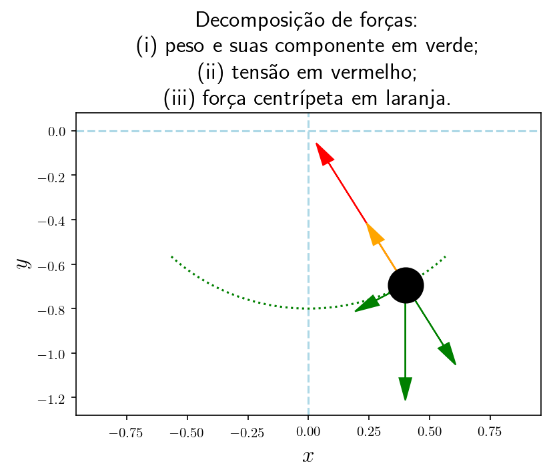

In [4]:
imresize(load(joinpath("img","pendulo_forcas.png")), ratio = 2/3)

## Modelo via leis de Newton

- $\omega=\dot\theta$ √© a **velocidade angular** e $\dot\omega = \ddot\theta$ √© a **acelera√ß√£o angular**.
- $\ell\dot\theta$ √© a **velocidade** (escalar, na dire√ß√£o do movimento) e $\ell\dot\theta$ √© a **componente tangencial da acelera√ß√£o**.
- $-mg\sin\theta$ √© a **componente tangencial da for√ßa gravitacional**.
- A componente tangencial nos d√° a **equa√ß√£o de movimento**

$$ m\ell\ddot\theta = - m g \sin\theta.
$$

- A velocidade $v = \ell\dot\theta$ d√° a **magnitude da for√ßa centr√≠peta** $m v^2/2$, que, por sua vez, determina a **tens√£o** $mg\cos\theta + m v^2/2$ exercida na haste.

## Pequenas oscila√ß√µes e aproxima√ß√£o linear do modelo

- Assumindo uma oscila√ß√£o pequena, usamos a aproxima√ß√£o

$$ \sin\theta \approx \theta, \qquad (\text{para } |\theta| \ll 1 ).
$$

- Isso nos d√° a equa√ß√£o linear de segunda ordem

$$ \ell\ddot\theta = - g \theta.
$$

- Suas solu√ß√µes:

$$ \theta(t) = C_1 \sin\left(\sqrt{\frac{g}{\ell}} t\right) + C_2 \cos\left(\sqrt{\frac{g}{\ell}} t\right) = A \cos\left(B + \sqrt{\frac{g}{\ell}} t\right), \qquad \forall t\in \mathbb{R}.
$$

com $A$ pequeno. O √¢ngulo inicial √© $\theta_0 = A\cos(B)$ e a velocidade angular inicial √© $\omega_0 = A\sqrt{g/\ell}\sin(B)$, onde $A$ √© a amplitude e $B$ √© a fase temporal.

- No caso de um p√™ndulo "largado" de um √¢ngulo $\theta_0$, temos $\omega_0 = 0$, de onde tiramos $A=\theta_0$ e $B=0$, com solu√ß√£o

$$ \theta(t) = \theta_0 \cos\left(\sqrt{\frac{g}{\ell}} t\right), \qquad \forall t\in \mathbb{R}.
$$


## Per√≠odo de pequenas oscila√ß√µes

* Da solu√ß√£o

$$ \theta(t) = A \cos\left(B + \sqrt{\frac{g}{\ell}} t\right), \qquad \forall t\in \mathbb{R}.
$$

e da periodicidade do cosseno, extra√≠mos o **per√≠odo $T$ de oscila√ß√£o**:

$$ \sqrt{\frac{g}{\ell}} T = 2\pi \quad \Longleftrightarrow \quad T = 2\pi\sqrt{\frac{\ell}{g}}.
$$

* Observe que esse resultado est√° de acordo com o resultado da an√°lise dimensional feita ateriormente, que nos diz que 

$$ T \propto \sqrt{\frac{\ell}{g}}.
$$

## P√™ndulo com grandes oscila√ß√µes

* A expans√£o em s√©rie de Taylor do seno √©

$$ \sin(\theta) = \theta - \frac{1}{3!}\theta^3 + \frac{1}{5!}\theta^5 - \cdots
$$

* Portanto, a aproxima√ß√£o $\sin(\theta) \approx \theta$ √© v√°lida para $|\theta| \ll 1$ e pode ser vista como uma aproxima√ß√£o de segunda ordem.

* Para oscila√ß√µes grandes, no entanto, essa aproxima√ß√£o fica prejudicada.

* Levando isso em considera√ß√£o, como isso afeta o per√≠odo?

* Observe que 

$$ |\ddot\theta| = \frac{g}{\ell}|\sin(\theta)| < \frac{g}{\ell}|\theta|.
$$

* Com base nisso, vemos que a acelera√ß√£o segundo o modelo n√£o-linear √© menor do que a do modelo linear.

* Portanto, podemos esperar que o per√≠odo seja maior do que o per√≠odo $2\pi \sqrt{\ell/g}$ previsto pelo modelo linear.

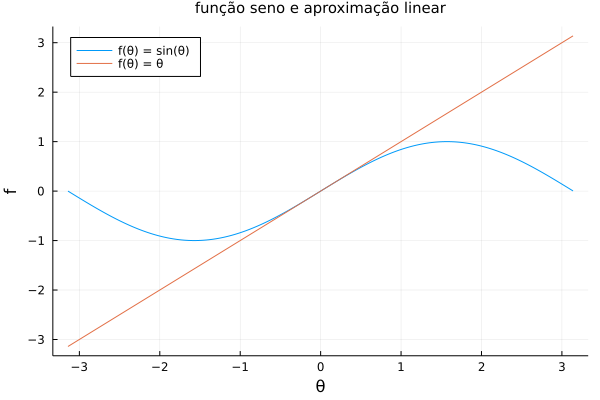

In [5]:
plot(title="fun√ß√£o seno e aproxima√ß√£o linear", titlefont = 10,
    xaxis = "Œ∏", yaxis = "f", legend = :topleft)
plot!(-œÄ:0.01:œÄ, [Œ∏ -> sin(Œ∏); Œ∏ -> Œ∏], label = ["f(Œ∏) = sin(Œ∏)" "f(Œ∏) = Œ∏"])

## Per√≠odo do p√™ndulo

* N√£o esperamos mais que o per√≠odo seja independente do √¢ngulo de oscila√ß√£o.

* Denotando por $\theta_{\max}$ o √¢ngulo de oscila√ß√£o m√°xima, escrevemos o per√≠odo na forma

$$ T = T(\theta_{\max}, \ell, g).
$$

* Voltando √† an√°lise dimensional, lembremos que o conjunto de quatro par√¢metros $\ell, g, T, \theta_{\max}$ possui dois grupos adimensionais, digamos

$$ \Pi_1 = T\sqrt{\frac{g}{\ell}}, \qquad \Pi_2 = \theta_{\max}.
$$

* Segue, ainda, do Teorema de Buckingham-Pi, que a rela√ß√£o $T = T(\theta_{\max}, \ell, g)$ pode ser escrito em uma vers√£o adimensional

$$ \Pi_1 = \mathcal{T}(\Pi_2),
$$

ou seja,

$$ T = \mathcal{T}(\theta_{\max}) \sqrt{\frac{\ell}{g}}.
$$


### Mudan√ßa de escala

* Outra forma de obter a rela√ß√£o acima para o per√≠odo √© via mudan√ßa de escala no modelo n√£o linear.

* Seja $\theta(t; \theta_{\textrm{max}}, \ell, g)$ uma solu√ß√£o de 

$$ \ell\ddot\theta = - g \sin(\theta).
$$

com √¢ngulo m√°ximo de oscila√ß√£o $\theta_{\textrm{max}}$ e per√≠odo de oscila√ß√£o $T = T(\theta_{\textrm{max}}, \ell, g)$

* Defina, agora,

$$ \phi(\tau) = \theta(\tau t_0), \qquad \tau \in \mathbb{R},
$$

onde 

$$ t_0 = \sqrt{\frac{\ell}{g}}.
$$

* Observe que $t_0$ tamb√©m tem unidade de tempo e $\tau\in \mathbb{R}$ √© adimensional.

* Como $\theta$ tem per√≠odo de oscila√ß√£o $T$, ent√£o $\phi$ tem per√≠odo de oscila√ß√£o $\tau= \mathcal{T}$ dado por $\tau t_0 =T$, ou seja,

$$ \mathcal{T} = \frac{T}{t_0} = T\sqrt{\frac{g}{\ell}}.
$$

### Equa√ß√£o adimensionalizada

* Temos

$$ \ell \frac{\mathrm{d}^2 \phi(\tau)}{\mathrm{d}\tau^2} = \ell \frac{\mathrm{d}^2}{\mathrm{d}\tau^2} \theta(\tau t_0) =  \ell t_0^2 \frac{\mathrm{d}^2\theta}{\mathrm{d} t^2}(\tau t_0) = - g t_0^2\sin(\theta(\tau t_0) = - g t_0^2\sin(\phi(\tau)).
$$

* Dividindo por $\ell$ e usando a defini√ß√£o de $t_0$, chegamos a

$$ \phi'' = -\sin(\phi).
$$

* Esta equa√ß√£o n√£o tem par√¢metro, o √∫nico par√¢metro envolvido *na solu√ß√£o* $\phi$ √© o √¢ngulo de oscila√ß√£o m√°xima $\theta_{\textrm{max}}$. Portanto, o seu per√≠odo de oscila√ß√£o s√≥ pode depender de $\theta_{\textrm{max}}$, digamos

$$ \mathcal T(\theta_{\textrm{max}}).
$$

### Per√≠odo

* Assim, obtemos a rela√ß√£o

$$ T\sqrt{\frac{g}{\ell}} = \mathcal T(\theta_{\textrm{max}}),
$$

ou seja

$$ T(\theta_{\textrm{max}}, \ell, g) = \mathcal T(\theta_{\textrm{max}}) \sqrt{\frac{\ell}{g}}.
$$

### Conserva√ß√£o de energia e Hamiltoniano

* O p√™ndulo simples √© um sistema conservativo.

* A sua equa√ß√£o de segunda ordem pode ser colocada como um sistema de primeira ordem,

$$ \begin{cases}
  \dot \theta = \omega, \\
  \dot \omega = -\frac{g}{\ell}\sin\theta.
\end{cases}
$$

* E pode ser visto como um sistema Hamiltoniano

$$ \begin{cases}
  \dot \theta = \displaystyle \frac{\partial H}{\partial\omega}(\theta, \omega), \\
  \dot \omega = \displaystyle -\frac{\partial H}{\partial\theta}(\theta, \omega).
\end{cases}
$$

com Hamiltoniano

$$ H(\theta, \omega) = \frac{1}{2}\omega^2 - \frac{g}{\ell}\cos\theta.
$$

* O Hamiltoniano tem a propriedade de ser conservado ao longo das √≥rbitas:

$$ H(\theta(t), \omega(t)) = \textrm{constante em } t\in\mathbb{R}.
$$

com a constante dependendo da √≥rbita, ou seja, dependendo do √¢ngulo m√°ximo $\theta_{\textrm{max}}$ (caso ele, de fato, oscile, ao inv√©s de girar continuamente em torno do extremo fixo).


### F√≥rmula para a velocidade angular

* Considerando o caso em que o p√™ndulo oscile com √¢ngulo m√°ximo $\theta_{\textrm{max}}$, temos que a velocidade angular $\omega$ se anula no momento em que esse √¢ngulo √© alcan√ßado, de modo que

$$ H(\theta(t), \omega(t)) = H(\theta_{\textrm{max}}, 0) = - \frac{g}{\ell}\cos\theta_{\textrm{max}}.
$$

* Portanto,

$$ \frac{1}{2}\omega(t)^2 - \frac{g}{\ell}\cos\theta(t) = - \frac{g}{\ell}\cos\theta_{\textrm{max}}.
$$

* Isso nos leva a

$$ \frac{\mathrm{d}\theta}{\mathrm{d}t}(t) = \omega(t) = \pm \sqrt{ \frac{2g}{\ell}\left(\cos(\theta(t)) - \cos(\theta_{\textrm{max}})\right)}
$$

### F√≥rmula para o per√≠odo

* Quando $\dot\theta(t) \neq 0$, obtemos do Teorema da Fun√ß√£o Inversa que $t\mapsto \theta(t)$ √© localmente invert√≠vel, $t = t(\theta)$, com $\dot t = 1 / \dot \theta$.

* Mais precisamente,

$$ \frac{\mathrm{d}t(\theta)}{\mathrm{d}\theta} = \frac{1}{\displaystyle \frac{\mathrm{d}\theta}{\mathrm{d}t}(t(\theta))}.
$$

* Da f√≥rmula para a velocidade angular, e usando que $\theta(t(\theta)) = \theta$, obtemos

$$ \frac{\mathrm{d}t}{\mathrm{d}\theta}(\theta) = \pm \frac{1}{\displaystyle \sqrt{ \frac{2g}{\ell}\left(\cos\theta - \cos\theta_{\textrm{max}}\right)}}.
$$

* Quando o √¢ngulo varia de $\theta_{\textrm{max}} > 0$ a $0$, o tempo decorre um quarto do per√≠odo. Assim, o per√≠odo √© dado por

$$ T(\theta_{\textrm{max}}, \ell, g) = 4 \int_{\theta_{\textrm{max}}}^0 \frac{\mathrm{d}t}{\mathrm{d}\theta}(\theta) \;\mathrm{d}\theta.
$$

* Nesse intervalo, a velocidade angular √© negativa. Assim, usando a f√≥rmula para a velocidade angular, escrevemos

$$ T(\theta_{\textrm{max}}, \ell, g) = - 4 \int_{\theta_{\textrm{max}}}^0 \frac{1}{\displaystyle \sqrt{ \frac{2g}{\ell}\left(\cos\theta - \cos\theta_{\textrm{max}}\right)}} \;\mathrm{d}\theta.
$$

* Podemos reescrever isso e obter a f√≥rmula final para o per√≠odo:

$$ T(\theta_{\textrm{max}}, \ell, g) = 4 \sqrt{\frac{\ell}{2g}}\int_0^{\theta_{\textrm{max}}} \frac{1}{\displaystyle \sqrt{\cos\theta - \cos\theta_{\textrm{max}}}} \;\mathrm{d}\theta.
$$

* Mais uma vez, observe que isso √© da forma

$$ T(\theta_{\textrm{max}}, \ell, g) = \sqrt{\frac{\ell}{g}} \mathcal T(\theta_{\textrm{max}}),
$$

com

$$ \mathcal T(\theta_{\textrm{max}}) = 2\sqrt{2}\int_0^{\theta_{\textrm{max}}} \frac{1}{\displaystyle \sqrt{\cos\theta - \cos\theta_{\textrm{max}}}} \;\mathrm{d}\theta.
$$

### Aproximando a f√≥rmula integral do per√≠odo

* A f√≥rmula de $\mathcal T(\theta_{\textrm{max}})$ envolve uma integral el√≠ptica completa, do primeiro tipo.

* Existem express√µes em termos de expans√£o em s√©ries de pot√™ncias ou de cossenos ou de quadrados de senos ou de polin√¥mios de Legendre, etc., mas n√£o existem f√≥rmulas fechadas em termos de fun√ß√µes elementares.

* Outra f√≥rmula √© via m√©dia aritm√©tica-geom√©trica:

$$ \mathcal T(\theta_{\textrm{max}}) = \frac{2\pi}{\mathop{AGM}(1, \cos(\theta_{\textrm{max}}/2))},
$$

onde $\mathop{AGM}(a, b)$ √© a fun√ß√£o m√©dia aritm√©tica-geom√©trica entre $a$ e $b$.

* Mais geralmente, 

$$ T(\theta_{\textrm{max}}) = \frac{T_p}{\mathop{AGM}(1, \cos(\theta_{\textrm{max}}/2))},
$$

onde

$$ T_p = 2\pi \sqrt{\frac{\ell}{g}}.
$$


### Per√≠odo em termos de s√©ries de pot√™ncias pares

* O per√≠odo $T(\theta_0, \ell, g)$ pode ser expresso como

$$
{\displaystyle T=2\pi {\sqrt {\frac {\ell}{g}}}\left[\sum _{n=0}^{\infty }\left({\frac {\left(2n\right)!}{2^{2n}\left(n!\right)^{2}}}\right)^{2}\sin ^{2n}\left({\frac {\theta _{0}}{2}}\right)\right]=2\pi {\sqrt {\frac {\ell}{g}}}\left(1+{\frac {1}{16}}\theta _{0}^{2}+{\frac {11}{3072}}\theta _{0}^{4}+\cdots \right)}
$$

In [6]:
coef(n::Int) = (factorial(2*n)/ 4^n / factorial(n)^2 )^2

coef (generic function with 1 method)

In [7]:
function ùíØ_s(Œ∏, N)
    r = 0.0
    for n in 0:N
        r += coef(n) * sin(Œ∏ / 2)^(2n)
    end
    return 2œÄ * r
end

ùíØ_s (generic function with 1 method)

In [8]:
# Wiki pendulo (math), https://oeis.org/A223068/list
denoms = [
    1, 16, 3072, 737280, 1321205760, 951268147200, 2009078326886400, 265928913086054400,
    44931349155019751424000, 109991942731488351485952000, 668751011807449177034588160000,
    2471703739640332158319837839360000
]

#https://oeis.org/A223067/list
numers = [
    1, 1, 11, 173, 22931, 1319183, 233526463, 2673857519, 39959591850371,
    8797116290975003, 4872532317019728133, 1657631603843299234219
    ]

cis = numers ./ denoms

function ùíØ_pol(t::Real)
    r = 0.0
    for i in eachindex(cis)
        r += cis[i] * t^(2(i-1))
    end
    return 2œÄ * r
end

ùíØ_pol (generic function with 1 method)

### M√©dia aritm√©tica-geom√©trica

* A fun√ß√£o m√©dia aritm√©tica-geom√©trica se define por um algoritmo simples: 

  * Consideramos a operacao $M: (a,b) \mapsto ((a+b)/2 , \sqrt{ab})$ (media aritm√©tica, media geom√©trica);

  * Aplicamos $M$ iterativamente;

  * Prova-se que $M^n(a,b) = (y,y)$ para algum $n$ finito, com a convergencia sendo quadr√°tica, muito rapida, com o n√∫mero de d√≠gitos corretos no m√≠nimo duplicando a cada itera√ß√£o.

  * Define-se $\mathop{AGM}(a,b) = y$

* Na pr√°tica, podemos parar as itera√ß√µes quando $M^n(a,b) = (y_1, y_2)$ com $y_1 \approx y_2$ com um dado grau de precis√£o pr√©-estabelecido (e.g.: 10 casas decimais).

### Implementando a fun√ß√£o m√©dia aritm√©tica-geom√©trica

In [9]:
# definindo a fun√ß√£o AGM

function medias(a::Real, b::Real)
    (a ‚â• 0 && b ‚â• 0) || throw(ArgumentError("arguments must be nonnegative"))
    ma = (a + b)/2
    mg = sqrt(a * b)
    return ma, mg
end

function agm(a::Real, b::Real; tol::Real = 1e-10, maxiter::Int = 100)
    tol > 0 || throw(ArgumentError("tolerance must be positive"))
    maxiter > 0 || throw(ArgumentError("maximum number of iterations must be positive"))
    y1, y2 = a, b
    n = 0
    while abs(y1 - y2) > tol && n < maxiter
        y1, y2 = medias(y1, y2)
        n += 1
    end
    return (y1 + y2)/2, abs(y1 - y2), n
end

println(agm(1, 2))
println(agm(1, 2, tol = 1e-5))
println(agm(12.345, 98.765))
println(agm(12.345, 98.765, tol = 1e-5))
println(agm(1, cos(0.001)))
println(agm(1,1000))

(1.4567910310469068, 0.0, 4)
(1.4567910310469068, 3.421470373687896e-8, 3)
(44.63812979234222, 0.0, 5)
(44.63812979234222, 4.441749013039953e-8, 4)
(0.9999997500000053, 3.11972669919669e-14, 1)
(189.38830240995088, 2.842170943040401e-14, 6)


In [10]:
ùíØ(Œ∏_max) = 2œÄ / agm(1, cos(Œ∏_max / 2))[1]

ùíØ (generic function with 1 method)

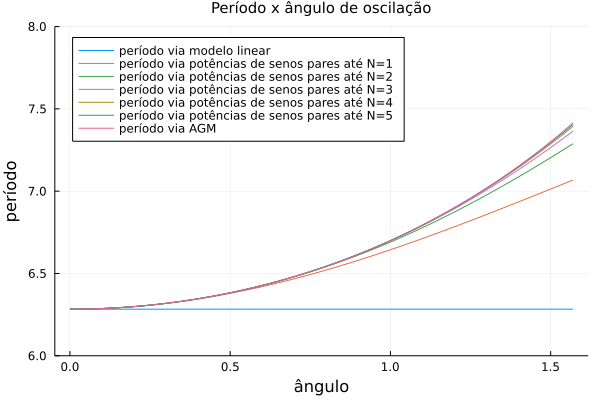

In [11]:
Œ∏ = 0:0.01:œÄ/2
plot(title = "Per√≠odo x √¢ngulo de oscila√ß√£o", titlefont = 10,
    xaxis = "√¢ngulo", yaxis = "per√≠odo", 
    ylims = (6.0, 8.0), legend=:topleft
    )
plot!(Œ∏, Œ∏ -> 2œÄ, label = "per√≠odo via modelo linear")
for N in 1:5
    plot!(Œ∏, Œ∏ -> ùíØ_s(Œ∏, N), label="per√≠odo via pot√™ncias de senos pares at√© N=$N")
end
plot!(Œ∏, ùíØ, label="per√≠odo via AGM")

In [12]:
@btime $(2œÄ)
for N in 1:5
    @btime ùíØ_s($(œÄ/4)/2, $N)
end
@btime ùíØ($(œÄ/4))
nothing

  0.055 ns (0 allocations: 0 bytes)
  38.701 ns (0 allocations: 0 bytes)
  95.200 ns (0 allocations: 0 bytes)
  144.404 ns (0 allocations: 0 bytes)
  191.229 ns (0 allocations: 0 bytes)
  239.553 ns (0 allocations: 0 bytes)
  25.015 ns (0 allocations: 0 bytes)


### Comparando as aproxima√ß√µes via AGM e via linear

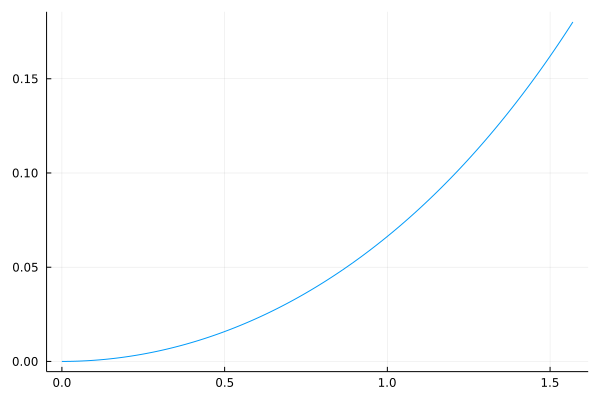

In [13]:
plot(Œ∏, Œ∏ -> (ùíØ(Œ∏) - 2œÄ)/2œÄ, label=nothing)

* Qual o √¢ngulo m√°ximo em que a diferen√ßa (absoluta) entre $\sin\theta$ e $\theta$ √© de 1%?

In [14]:
Œ∏‚ÇÅ = round(rad2deg(maximum(filter(Œ∏ -> abs(sin(Œ∏) - Œ∏) ‚â§ 0.01, 0.001:0.001:œÄ/2))), digits = 2)
println("√Çngulo m√°ximo: $(Œ∏‚ÇÅ)¬∞")

√Çngulo m√°ximo: 22.46¬∞


* Qual o √¢ngulo m√°ximo em que a diferen√ßa (relativa) entre os per√≠odos calculados via m√©dia aritm√©tica-geom√©trica e via aproxima√ß√£o linear √© de 1%?

In [15]:
Œ∏‚ÇÇ = round(rad2deg(maximum(filter(Œ∏ -> abs(ùíØ(Œ∏) - 2œÄ)/2œÄ ‚â§ 0.01, 0:0.001:œÄ/2))), digits = 2)
println("√Çngulo m√°ximo: $(Œ∏‚ÇÇ)¬∞")

√Çngulo m√°ximo: 22.8¬∞


* No entanto, √† medida em que o p√™ndulo oscila, ao longo de v√°rios per√≠odos, esse erro acumula e aumenta consideravelmente.

In [16]:
function f_pendulo!(dœâ, œâ, Œ∏, p, t)
    ‚Ñì, g = p
    dœâ .= - ( g / ‚Ñì ) * sin.( Œ∏ )
    return dœâ
end

‚Ñì = 1.0
g = 9.8

tspan = 6 * 2œÄ * ‚àö(‚Ñì / g) # aproximadamente seis ciclos

Œ∏‚ÇÄ = œÄ / 4
œâ‚ÇÄ = 0.0

prob = SecondOrderODEProblem(f_pendulo!, [œâ‚ÇÄ], [Œ∏‚ÇÄ], tspan, [‚Ñì, g])
sol = solve(prob, KahanLi8(), dt=1/10)
println(sol.retcode)

Success


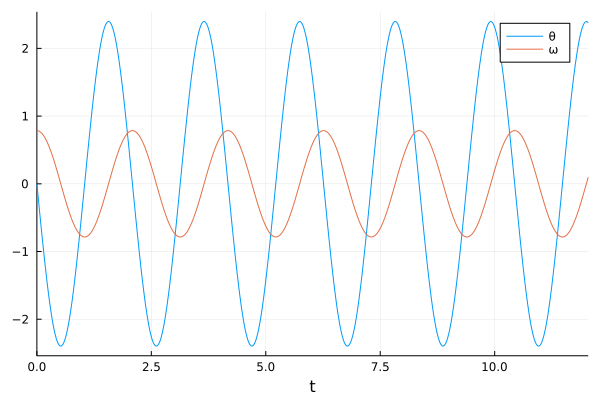

In [17]:
plot(sol, label = ["Œ∏" "œâ"], xaxis = "t")

In [1]:
angulos = (œÄ / 20, œÄ / 14, œÄ / 10, œÄ / 8, œÄ / 6, œÄ / 4, œÄ / 3)
for Œ∏‚ÇÄ in angulos
    prob = SecondOrderODEProblem(f_pendulo!, [œâ‚ÇÄ], [Œ∏‚ÇÄ], tspan, [‚Ñì, g])
    lsol = solve(prob, KahanLi8(), dt = 0.02)
    p = plot(title = "angulo em graus: $(round(rad2deg(Œ∏‚ÇÄ), digits = 2))¬∞", titlefont = 10,
        xaxis = "t", yaxis = "Œ∏ (rad)", size = (600, 200), legend = :bottomleft)
    plot!(p, lsol, vars = 2, label = "modelo n√£o linear")
    plot!(p, lsol.t, Œ∏‚ÇÄ * cos.( ‚àö(g/‚Ñì) * lsol.t ), label = "modelo linear")
    display(p)
end
    

LoadError: UndefVarError: œâ‚ÇÄ not defined

## Exerc√≠cios

1. Usando a f√≥rmula
$$ \mathcal T(\theta_{\textrm{max}}) = 2\sqrt{2}\int_0^{\theta_{\textrm{max}}} \frac{1}{\displaystyle \sqrt{\cos\theta - \cos\theta_{\textrm{max}}}} \;\mathrm{d}\theta.
$$
mostre que $\lim_{\theta_{\textrm{max}} \searrow 0} \mathcal{T}(\theta_{\textrm{max}}) = 2\pi$.

1. Mostre que $AGM(\lambda a, \lambda b) = \lambda AGM(a,b)$, para todo $\lambda > 0$.